In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,InputLayer,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
 tf.config.threading.set_inter_op_parallelism_threads(32)

In [4]:
import cv2 as cv
import random

In [5]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
         #print(dir1)
        for file in os.listdir(os.path.join(img_folder,dir1)):
            img=cv.imread(os.path.join(img_folder,dir1,file),cv.IMREAD_GRAYSCALE)
            img=cv.resize(img,(224,224),interpolation=cv.INTER_LANCZOS4)
            img=img.astype('float32')
            img/=255.0
            img_data_array.append(img)
            class_name.append(dir1)
    return img_data_array,class_name
img_data,class_name=create_dataset(r"/kaggle/input/brain-tumor-mri-dataset/Training")
            

In [6]:
len(img_data)

5712

In [7]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
         #print(dir1)
        for file in os.listdir(os.path.join(img_folder,dir1)):
            img=cv.imread(os.path.join(img_folder,dir1,file),cv.IMREAD_GRAYSCALE)
            img=cv.resize(img,(224,224),interpolation=cv.INTER_LANCZOS4)
            img=img.astype('float32')
            img/=255.0
            img_data_array.append(img)
            class_name.append(dir1)
    return img_data_array,class_name
img_data1,class_name1=create_dataset(r"/kaggle/input/brain-tumor-mri-dataset/Testing")
            

In [8]:
len(class_name1)

1311

In [9]:
img_data.extend(img_data1)

In [10]:
len(img_data)

7023

In [11]:
class_name.extend(class_name1)

In [12]:
set(class_name)

{'glioma', 'meningioma', 'notumor', 'pituitary'}

In [13]:
import numpy as np
target_dict={k:v for v,k in enumerate(np.unique(class_name))}
target_dict

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [14]:
target_val=[target_dict[class_name[i]] for i in range(len(class_name))]

In [15]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# sample class vector
target_val= np.array(target_val)

# convert to binary class matrix
target_val= to_categorical(target_val, num_classes=4)
len(target_val)

7023

In [16]:
X_train=np.array(tf.expand_dims(img_data,axis=-1), np.float32)

In [17]:
X_train.shape

(7023, 224, 224, 1)

In [18]:
Y_train=np.array(target_val, np.uint32)
Y_train.shape

(7023, 4)

In [19]:
num_classes=4
img_rows=224
img_cols=224

In [20]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

In [21]:
es=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [22]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import decode_predictions
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Input,ZeroPadding2D,Activation,Add
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf
from PIL import Image 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 
from tensorflow.keras.initializers import glorot_uniform

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
# Creating Densenet121
def densenet(input_shape, n_classes, filters = 32):
    
    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):
        
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x
    
    def dense_block(x, repetition):
        
        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x
        
    def transition_layer(x):
        
        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x
    
    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition)
        x = transition_layer(d)
    x = GlobalAveragePooling2D()(d)
    x=Dense(2048, activation='relu',name="final")(x)
    output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(input, output)
    return model
input_shape = 224, 224, 1
n_classes = 4
model = densenet(input_shape,n_classes)

In [24]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      3,200 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 56, 56,    │        256 │ max_pooling2d[0]… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │      8,320 │ re_lu[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     36,896 │ re_lu_1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 56, 56,    │          0 │ conv2d_2[0][0],   │
│ (Concatenate)       │ 96)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        384 │ concatenate[0][0] │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     12,416 │ re_lu_2[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │     36,896 │ re_lu_3[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 56, 56,    │          0 │ conv2d_4[0][0], 

 Total params: 9,144,516 (34.88 MB)

 Trainable params: 9,063,044 (34.57 MB)

 Non-trainable params: 81,472 (318.25 KB)

In [25]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [26]:
history=model.fit(X_train,Y_train,batch_size=20,epochs=100,validation_split=0.2)

Epoch 1/100


I0000 00:00:1733178885.642211     100 service.cc:145] XLA service 0x7ef7400026e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733178885.642269     100 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733178885.642274     100 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733178977.305828     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


281/281 ━━━━━━━━━━━━━━━━━━━━ 303s 542ms/step - accuracy: 0.7142 - loss: 0.7278 - val_accuracy: 0.2883 - val_loss: 6.2464
Epoch 2/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 53s 188ms/step - accuracy: 0.8658 - loss: 0.3661 - val_accuracy: 0.3117 - val_loss: 2.8457
Epoch 3/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 54s 192ms/step - accuracy: 0.9077 - loss: 0.2587 - val_accuracy: 0.7267 - val_loss: 0.8932
Epoch 4/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 55s 194ms/step - accuracy: 0.9185 - loss: 0.2261 - val_accuracy: 0.8577 - val_loss: 0.4814
Epoch 5/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 55s 195ms/step - accuracy: 0.9481 - loss: 0.1388 - val_accuracy: 0.8000 - val_loss: 0.7675
Epoch 6/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 55s 196ms/step - accuracy: 0.9578 - loss: 0.1257 - val_accuracy: 0.7537 - val_loss: 0.7538
Epoch 7/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 55s 196ms/step - accuracy: 0.9573 - loss: 0.1218 - val_accuracy: 0.9203 - val_loss: 0.2471
Epoch 8/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 55s 197ms/step - accuracy: 0.9775 - loss: 0.07

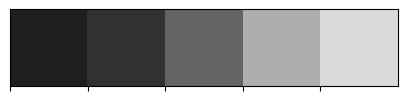

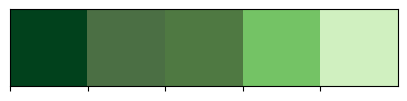

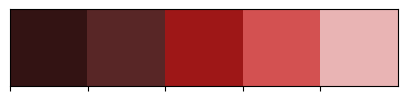

In [27]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

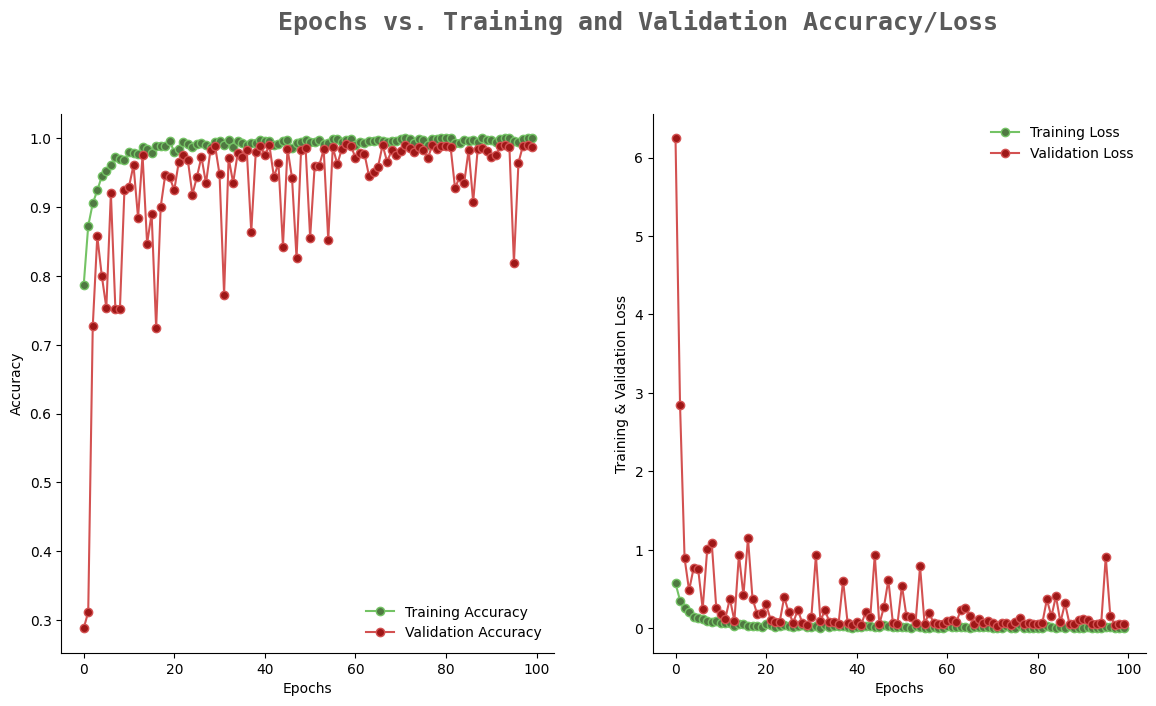

In [34]:
# filterwarnings('ignore')

epochs = [i for i in range(100)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [35]:
import keras
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="final").output,)

In [36]:
f=open("feature.csv","w")
for i in range(len(img_data)):
    img=img_data[i]
    img=np.expand_dims(img,axis=0)
    features =list( feature_extractor(img))
    for j in list(features[0]):
        f.write(str(float(j))+",")
    f.write(str(target_val[i])+"\n")    
f.close()
    

In [37]:
import pandas as pd
df=pd.read_csv(r"feature.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0.514992,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.351385,0.0,2.136160,0.0,4.284869,0.000000,0.000000,0.000000,0.000000,[0. 0. 0. 1.]
1,0.960996,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.398790,0.0,3.122510,0.0,6.285431,0.000000,0.025918,0.000000,0.475214,[0. 0. 0. 1.]
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.649283,0.0,2.933122,0.0,4.666120,0.000000,0.000000,0.000000,0.541519,[0. 0. 0. 1.]
3,0.805671,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.404918,0.0,2.027264,0.0,4.581749,0.000000,0.000000,0.000000,0.000000,[0. 0. 0. 1.]
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,2.276998,0.0,3.004745,0.0,3.949085,0.000000,0.000000,0.000000,0.218675,[0. 0. 0. 1.]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,3.700545,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,1.296169,0.000000,1.939211,1.097975,0.000000,[1. 0. 0. 0.]
7019,4.004484,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,1.749426,0.196615,2.228537,2.287589,0.000000,[1. 0. 0. 0.]
7020,5.070181,0.262984,0.0,0.350246,0.0,0.0,0.0,0.0,0.315821,0.0,...,0.000000,0.0,0.000000,0.0,3.040841,0.000000,2.779471,0.922607,0.000000,[1. 0. 0. 0.]
7021,3.736326,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,2.562678,0.000000,2.082053,1.260832,0.000000,[1. 0. 0. 0.]


In [38]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [42]:
grid_search.best_score_

0.9985761322505095

In [43]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [44]:
rf_best.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [45]:
from sklearn.metrics import classification_report
y_pred=rf_best.predict(x_test)
print(classification_report(y_pred,y_test))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       1.00      1.00      1.00       344
[0. 0. 1. 0.]       1.00      1.00      1.00       413
[0. 1. 0. 0.]       1.00      1.00      1.00       340
[1. 0. 0. 0.]       1.00      1.00      1.00       308

     accuracy                           1.00      1405
    macro avg       1.00      1.00      1.00      1405
 weighted avg       1.00      1.00      1.00      1405



In [46]:
from keras.models import load_model
model.save("densnet121.h5")  

In [1]:
from IPython.display import display,clear_output
import io
# import pickle
# # Load the model from the file
# with open('model_gpu.pkl', 'rb') as file:
#     model_r = pickle.load(file)
import tensorflow as tf
# Load the model to extract features
model = tf.keras.models.load_model('C:\Projects\Computer Vision\densnet121.h5')

In [2]:
def img_pred(uploader):
        tu={
            "0":"GLIOMA",
            "1":"MENINGIOMA",
            "2":"NO TUMOUR",
            "3":"PITUTARY"
        }
        if uploader:
            img = Image.open(io.BytesIO(uploader['content']))
        else:
            print("No files have been uploaded")
#         image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
        # print(image)
        img=cv2.resize(img,(224,224),interpolation=cv2.INTER_LANCZOS4)
        # print(img)
        # print(img.shape)
        img=img.astype('float32')
        img/=255.0
        img=np.expand_dims(img,axis=0)
        feature_extractor = keras.Model(inputs=model.inputs,outputs=model.get_layer(name="final").output,)
        features =list(feature_extractor(img))
        l=[]
        for i in list(features):
            for j in list(i): 
                l.append(np.float32(j))
        final_features=list(np.array(l).reshape(1,-1))        
        prediction=model_r.predict(final_features)
        prediction=list(prediction)[0].strip('[]').split().index('1.')
        output=tu[str(prediction)]
        print(output)

In [3]:
from IPython.display import display,clear_output
import io
from PIL import Image
import cv2
import numpy as np
import keras

In [52]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
display(uploader)
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        for i in uploader.value:
            d=i
        img_pred(d)
button.on_click(on_button_clicked)
widgets.VBox([button,out])

FileUpload(value=(), description='Upload')